<a href="https://colab.research.google.com/github/MuhammadAinurRiziq13/Machine-Learning-TI-3E-2024/blob/main/Week3_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



*   **Nama  : Muhammad Ainur Riziq**
*   **Absen : 19**
*   **Kelas : TI - 3E**


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Transformasi Linear Brightness
      formula: g(x,y) = f(x,y) + b
      g(x,y) adalah nilai pixel setelah transformasi, f(x,y) adalah nilai pixel asli, b adalah nilai brightness

 Mengubah tingkat kecerahan citra 
--------------------------------
Masukkan nilai kecerahan: 20


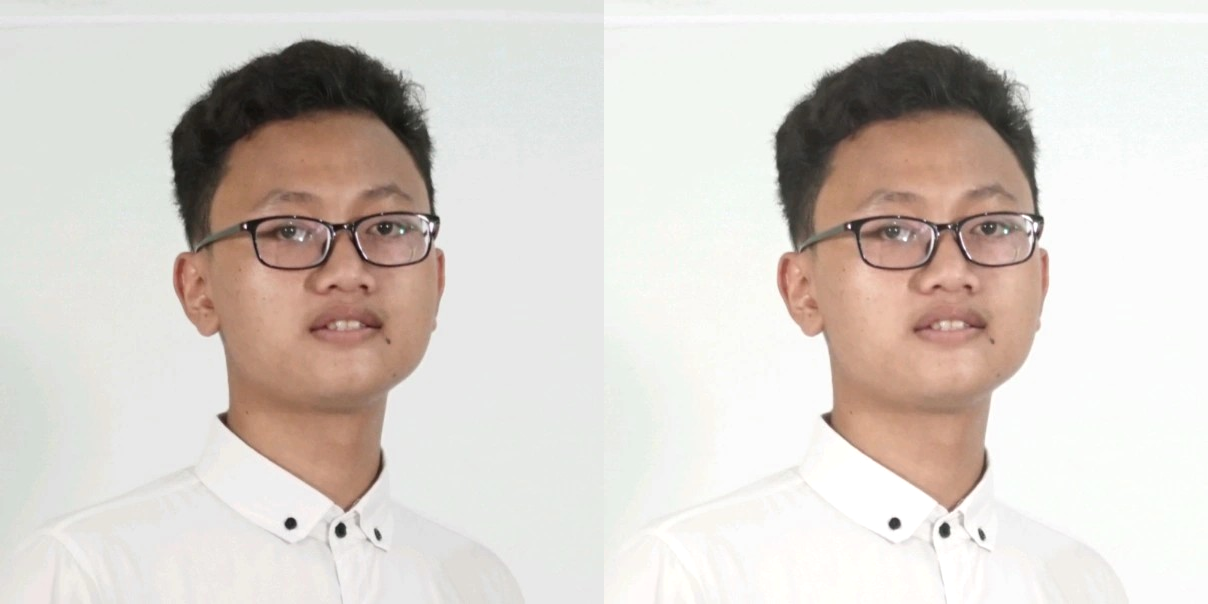

In [2]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
print(' Mengubah tingkat kecerahan citra ')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/pcvk/prf.jpeg')
brightness_image = np.zeros(original.shape, original.dtype)

#askes per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

# cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta-brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

### TUGAS PRAKTIKUM

1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang
terdapat pada bagian Ulasan Teori,


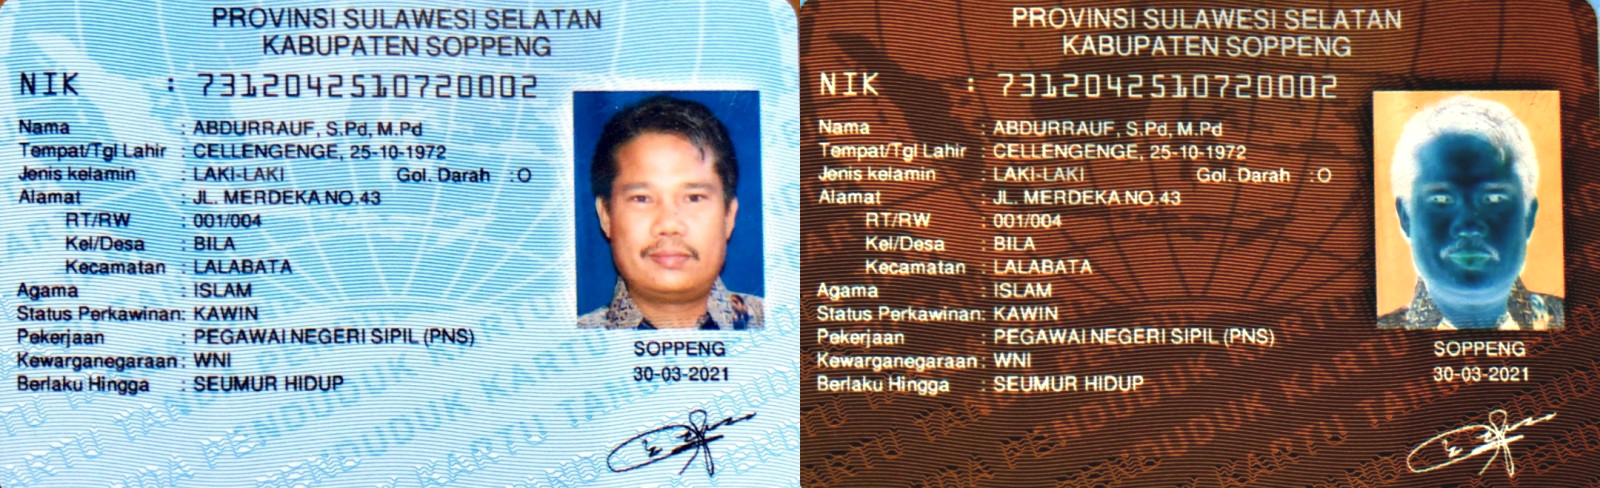

In [ ]:
original = cv.imread('/content/drive/MyDrive/pcvk/KTP.jpeg')
inverse_image = np.zeros(original.shape, original.dtype)

#askes per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      inverse_image[y,x,c] = np.clip(255 - original[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat((original, inverse_image))
cv2_imshow(final_frame)

2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori untuk kontras, sehingga
menghasilkan keluaran seperti berikut

 Mengubah tingkat kontras dan kecerahan citra 
--------------------------------
Masukkan nilai kecerahan [-255 - 255]: 50
Masukkan nilai kontras [1.0 - 3.0]: 2


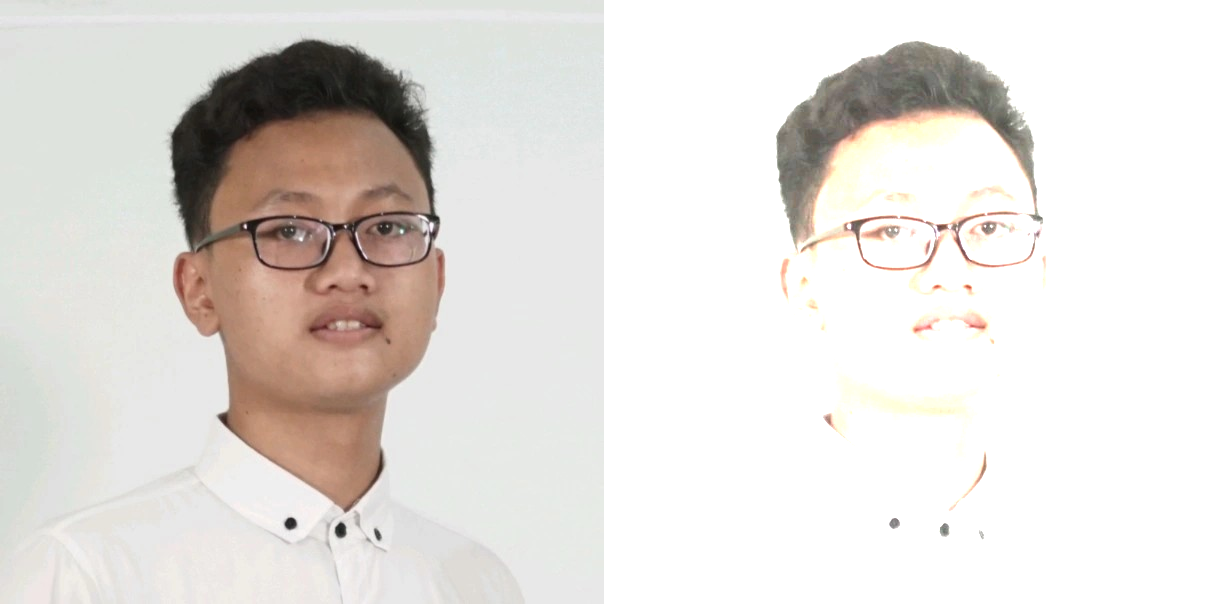

In [ ]:
print(' Mengubah tingkat kontras dan kecerahan citra ')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan [-255 - 255]: '))
  contrast = int(input('Masukkan nilai kontras [1.0 - 3.0]: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/pcvk/prf.jpeg')
brightness_image = np.zeros(original.shape, original.dtype)

#askes per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(contrast * original[y,x,c] + brightness, 0, 255)

# cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta-brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

3.  Implementasikan transformasi logarithmic brightness pada Google Colaboratory
menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi
log, sehingga menghasilkan keluaran seperti berikut:

 Mengubah tingkat kecerahan citra 
--------------------------------
Masukkan nilai kecerahan: 50


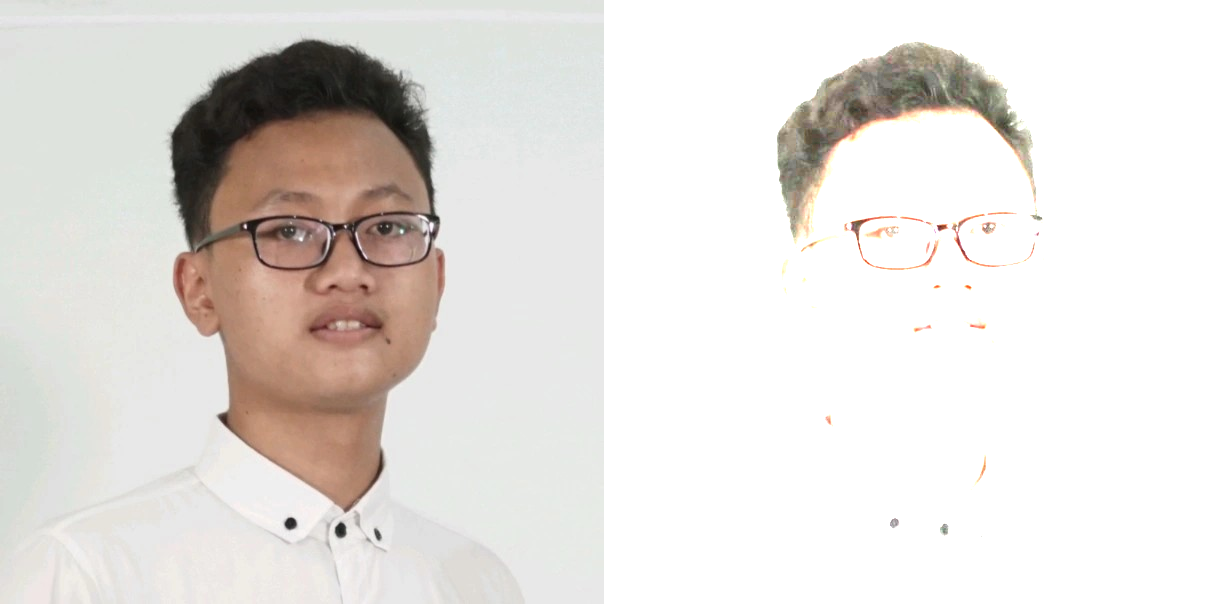

In [ ]:
print(' Mengubah tingkat kecerahan citra ')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/pcvk/prf.jpeg')
brightness_image = np.zeros(original.shape, original.dtype)

#askes per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] * np.log(1+brightness), 0, 255)

# cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta-brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

4.  Implementasikan transformasi grayscale menggunakan metode averaging, lightness,
dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada
bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

In [4]:
import matplotlib.pyplot as plt

# Read the KTP image
ktp = cv.imread('/content/drive/MyDrive/pcvk/KTP.jpeg')

# function for graysacale transformation
def apply_grayscale_transformation(image, method='average'):
    # Initialize grayscale array
    grayscale = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)

    # Loop through each pixel and apply the specified grayscale transformation
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            # Get RGB values
            r, g, b = image[y, x]

            if method == 'average':
                # Averaging method
                grayscale[y, x] = np.mean([r, g, b])
            elif method == 'lightness':
                # Lightness method
                grayscale[y, x] = np.mean([np.max([r, g, b]), np.min([r, g, b])])
            elif method == 'luminance':
                # Luminance method
                grayscale[y, x] = 0.299 * r + 0.587 * g + 0.114 * b
            else:
                raise ValueError("Invalid method. Choose from 'average', 'lightness', or 'luminance'.")

    # Convert grayscale image to BGR so it has 3 channels
    grayscale_bgr = cv.cvtColor(grayscale, cv.COLOR_GRAY2BGR)

    return grayscale_bgr

# function for display images
def display_images(original_image, grayscale_image, method_name):
    plt.figure(figsize=(15, 5))

    # Show original image
    plt.subplot(1, 2, 1)
    plt.imshow(cv.cvtColor(original_image, cv.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis('off')

    # Show grayscale image
    plt.subplot(1, 2, 2)
    plt.imshow(cv.cvtColor(grayscale_image, cv.COLOR_BGR2RGB), cmap='gray')
    plt.title(f"Grayscale {method_name.capitalize()}")
    plt.axis('off')

    plt.show()

A. Averaging

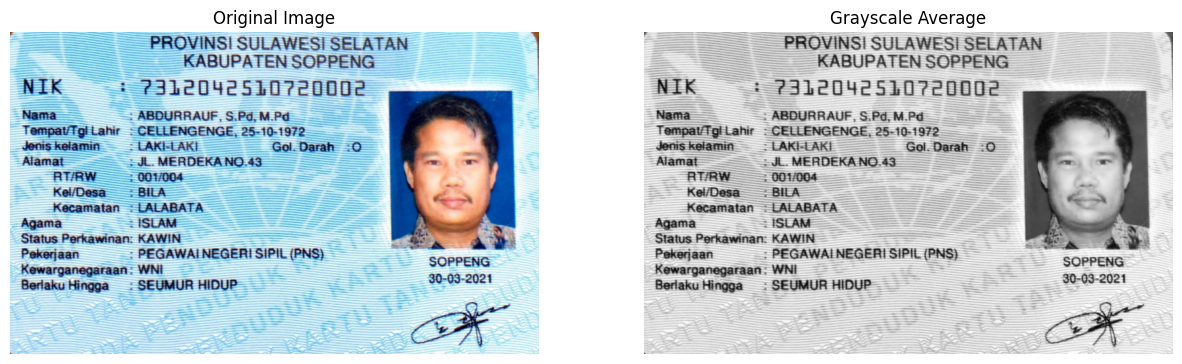

In [ ]:
grayscale_image = apply_grayscale_transformation(ktp, method='average')
display_images(ktp, grayscale_image, 'average')

B. Lightness

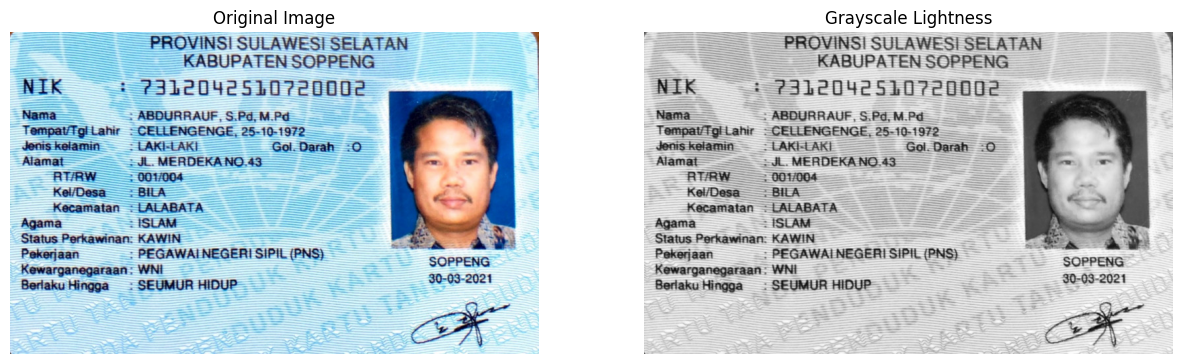

In [ ]:
grayscale_image = apply_grayscale_transformation(ktp, method='lightness')
display_images(ktp, grayscale_image, 'lightness')

C. Luminance

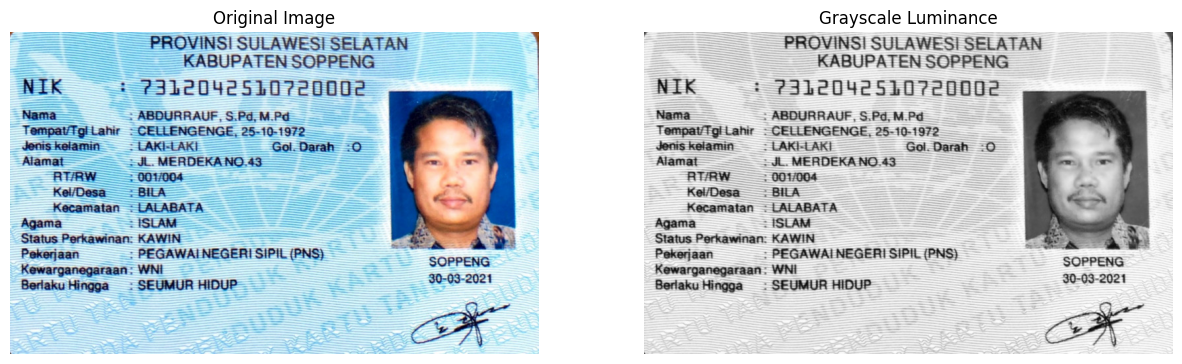

In [ ]:
grayscale_image = apply_grayscale_transformation(ktp, method='luminance')
display_images(ktp, grayscale_image, 'luminance')

5.  Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal,
tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna
biru

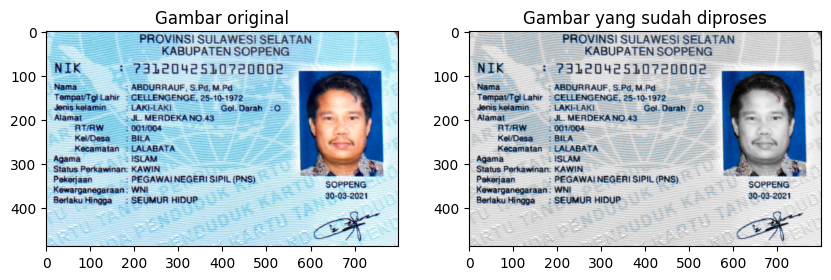

In [7]:
# Mengonversi gambar dari BGR ke RGB untuk ditampilkan di Matplotlib
ktp_rgb = cv.cvtColor(ktp, cv.COLOR_BGR2RGB)

# Rentang bawah dan atas untuk warna biru dalam format BGR
lower_blue = np.array([100, 0, 0])
upper_blue = np.array([255, 180, 180])

# Membuat mask biner untuk seleksi warna biru
mask = cv.inRange(ktp, lower_blue, upper_blue)

# Mengonversi gambar asli menjadi grayscale
gray_image = cv.cvtColor(ktp, cv.COLOR_BGR2GRAY)
gray_image_bgr = cv.cvtColor(gray_image, cv.COLOR_GRAY2BGR)

# Menerapkan mask pada gambar asli dan grayscale
result = np.where(mask[:, :, None].astype(bool), ktp, gray_image_bgr)

# Mengonversi hasil ke RGB untuk ditampilkan dengan Matplotlib
result_rgb = cv.cvtColor(result, cv.COLOR_BGR2RGB)

# Menampilkan gambar asli dan gambar hasil
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Gambar original')
plt.imshow(ktp_rgb)

plt.subplot(1, 2, 2)
plt.title('Gambar yang sudah diproses')
plt.imshow(result_rgb)

plt.show()


https://github.com/MuhammadAinurRiziq13/PCVK_2024_19